# Tutorial: SSH Agent

Tutorial SSH Kernel with [ssh-agent](https://linux.die.net/man/1/ssh-agent).

## Start jupyter notebook with ssh-agent 

In console:

```
$ ssh-agent jupyter notebook
```

## Generate key and connect the server

In `Terminal` in Jupyter notebook, generate keys with passphrase and connect the server with it.

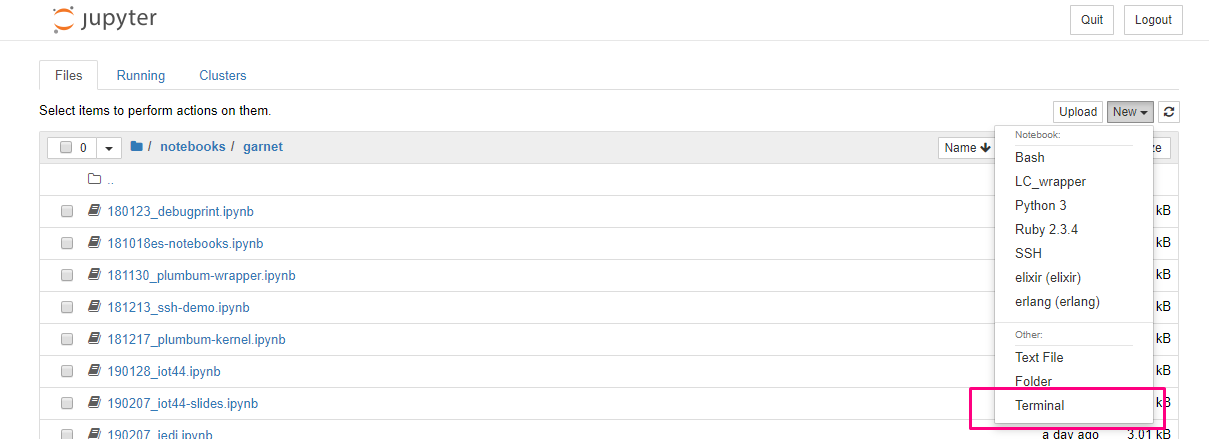

```
$ ssh-keygen -f /tmp/id_ed25519_key -t ed25519 -m PEM
Enter passphrase (empty for no passphrase):
Enter same passphrase again:
Your identification has been saved in /tmp/id_ed25519_key.
Your public key has been saved in /tmp/id_ed25519_key.pub.
The key fingerprint is:
SHA256:FtwAprPsfW5Fu/SwQLbMS+TUw8gJLvyX2/8zTj8apsY masaru@garnet
The key's randomart image is:
+--[ED25519 256]--+
|      o..        |
|     o.. o       |
|   .o. oo=.      |
|   .oo. O.=      |
|    oo OS+ o     |
|   . ...X =      |
|    . .o.B.= o.  |
|       o+ +E+.+o |
|       .. .o.++oo|
+----[SHA256]-----+

$ edit ~/.ssh/config

# (You must customize these definitions to your environment.)

+ Host testagent
+   Hostname localhost
+   User root
+   Port 11122
+   IdentityFile /tmp/id_ed25519_key

$ ssh testagent
The authenticity of host '[localhost]:11122 ([::1]:11122)' can't be established.
ECDSA key fingerprint is SHA256:Rath9QRSP1hKeFkIGwL1c1WUV+haHdJrxTyilRrRNnE.
Are you sure you want to continue connecting (yes/no)? yes
Warning: Permanently added '[localhost]:11122' (ECDSA) to the list of known hosts.
root@localhost's password:
root@b12253d3c87b:~# exit

$ ssh-copy-id -i /tmp/id_ed25519_key testagent
/usr/bin/ssh-copy-id: INFO: Source of key(s) to be installed: "/tmp/id_ed25519_key.pub"/usr/bin/ssh-copy-id: INFO: attempting to log in with the new key(s), to filter out any that are alre
ady installed/usr/bin/ssh-copy-id: INFO: 1 key(s) remain to be installed -- if you are prompted now it is to insta
ll the new keys
root@localhost's password:

Number of key(s) added: 1

Now try logging into the machine, with:   "ssh 'testagent'"
and check to make sure that only the key(s) you wanted were added.


$ ssh testagent id
Enter passphrase for key '/tmp/id_ed25519_key':uid=0(root) gid=0(root) groups=0(root)
```

## Add a private key identities to the authentication agent

```
$ ssh-add /tmp/id_ed25519_key
Enter passphrase for /tmp/id_ed25519_key:
Identity added: /tmp/id_ed25519_key (masaru@garnet)

# Now you can connect without passphrase
$ ssh testagent id
uid=0(root) gid=0(root) groups=0(root)
```

## Execute commands in notebook

In [1]:
%login testagent

[ssh] Login to testagent...
[ssh] host=testagent hostname=localhost other_conf={'keyfile': ['/tmp/id_ed25519_key'], 'user': 'root', 'port': 11122}
[ssh] Successfully logged in.


In [2]:
id

[ssh] host = testagent, cwd = /root
uid=0(root) gid=0(root) groups=0(root)



In [3]:
%logout

[ssh] Successfully logged out.
